***
**Introduction to Machine Learning** <br>
__[https://slds-lmu.github.io/i2ml/](https://slds-lmu.github.io/i2ml/)__
***

# 1. Python Installation & Setup

## 1.1 Installation

Python can be installed in many ways, e.g., by
- directly downloading it from python.org: https://www.python.org/downloads/
- downloading Miniconda: https://docs.conda.io/en/latest/miniconda.html
- installing Python via the Anaconda distribution: https://docs.anaconda.com/anaconda/install/



Once Python is installed, you’ll need a way to manage packages. Unlike in R/RStudio where package management is straightforward, Python has a more fragmented system. There are two (concurring) package management systems:
- pip (+ PyPi)
- conda (+ Anaconda repository)

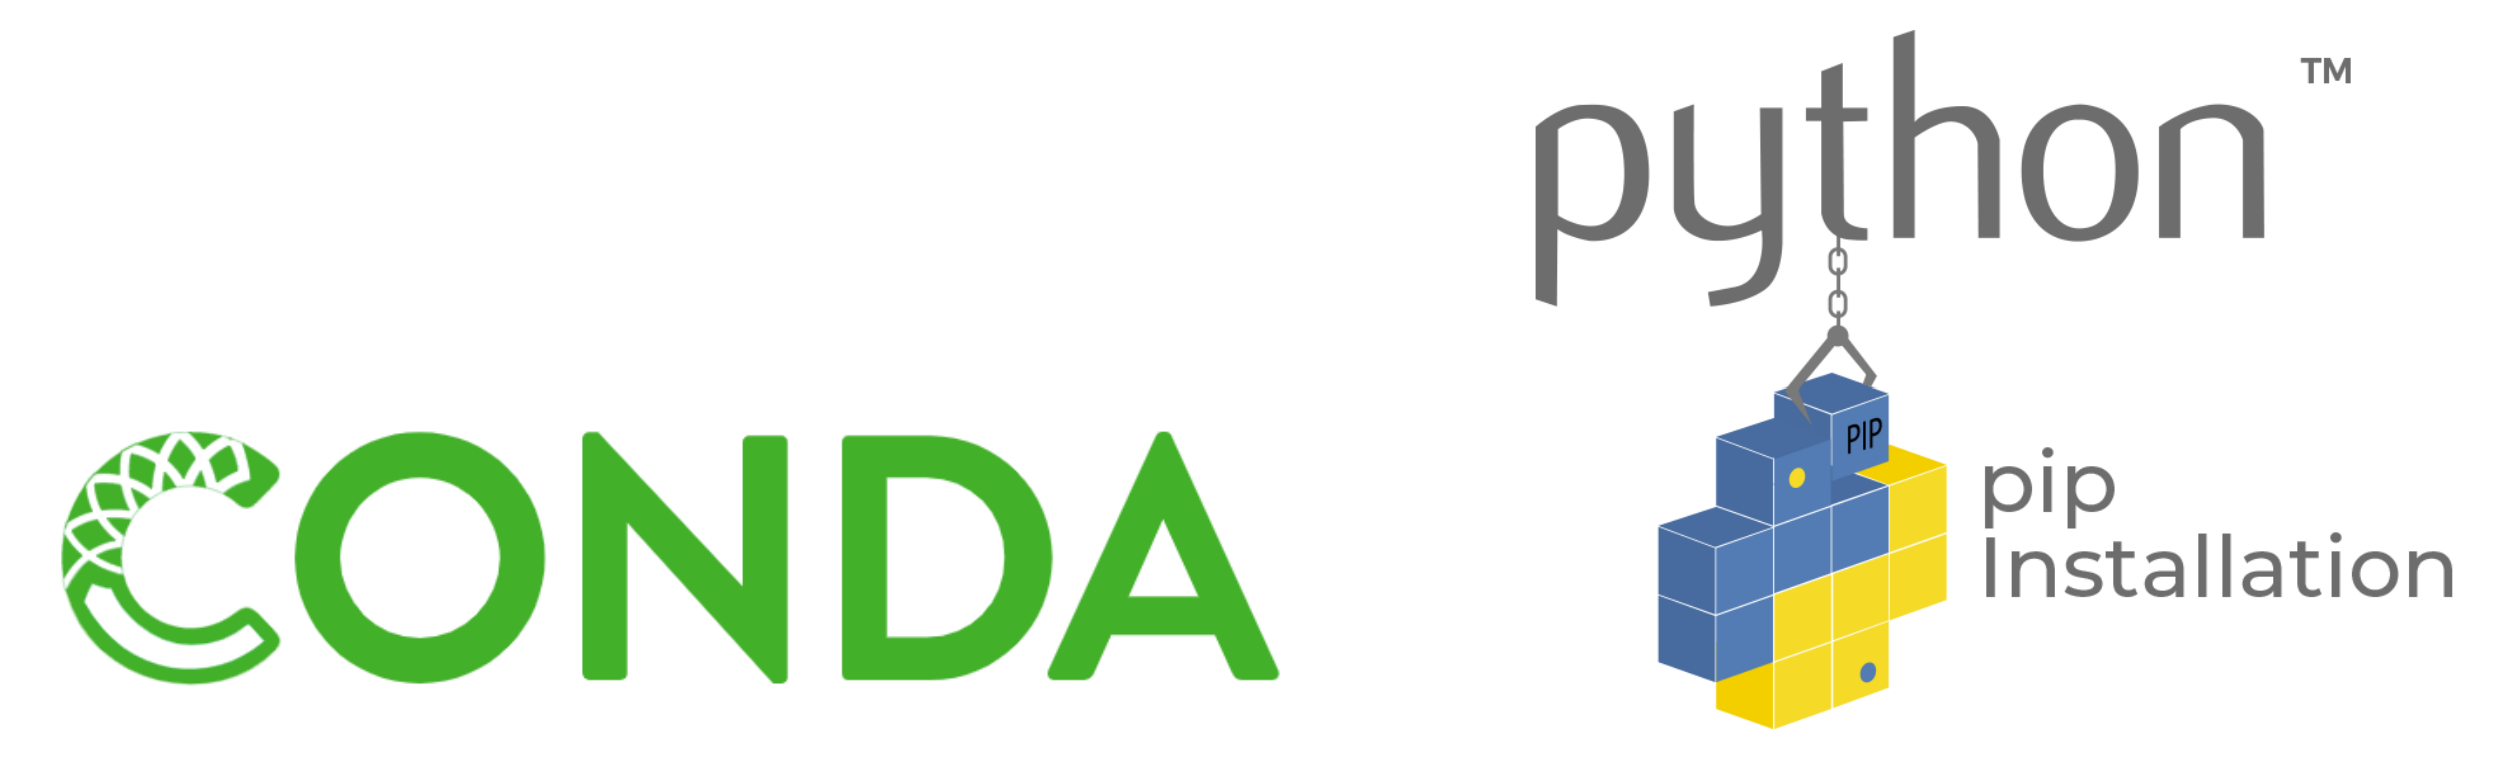

### Key facts - pip

Installs packages from the [Python Package Index (PyPi)](https://pypi.org/)
- pip packages are source distributions (compiler needed) or wheels[<sup>[1]</sup>](#fn1)
- pip installs dependencies one by one, resolving them recursively
- Limited to Python software
- No built-in support for **virtual environments** (but possible)
- \> 150k packages available on PyPi

***
<span id="fn1">[1]
wheels are smaller + install faster than a source distribution and do
not require a compiler


### Key facts - conda 

Installs packages from the [Anaconda repository](https://repo.anaconda.com/)
- Conda packages are binaries, no need for compilers
- SAT solver to verify requirements of all packages
- Not limited to Python software
- Easier to create/manage **virtual environments**
- ∼ 1.5k packages available in the Anaconda repository

## 1.2 Ways to use Python

### 1.2.1 Python via console

Start Python in Terminal / Console / Command Line

In [ ]:
python

Approximate result:

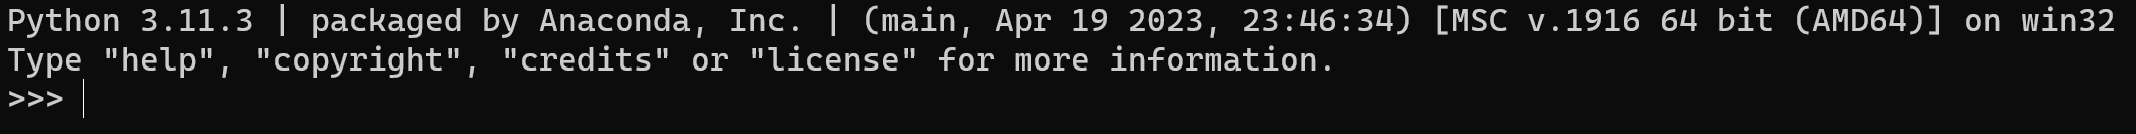

Similar to R console:

In [107]:
1+1

2

Exit with Ctrl-D or

In [ ]:
exit()

### 1.2.2 Anaconda

Anaconda is a widely used open-source distribution of Python:
https://www.anaconda.com

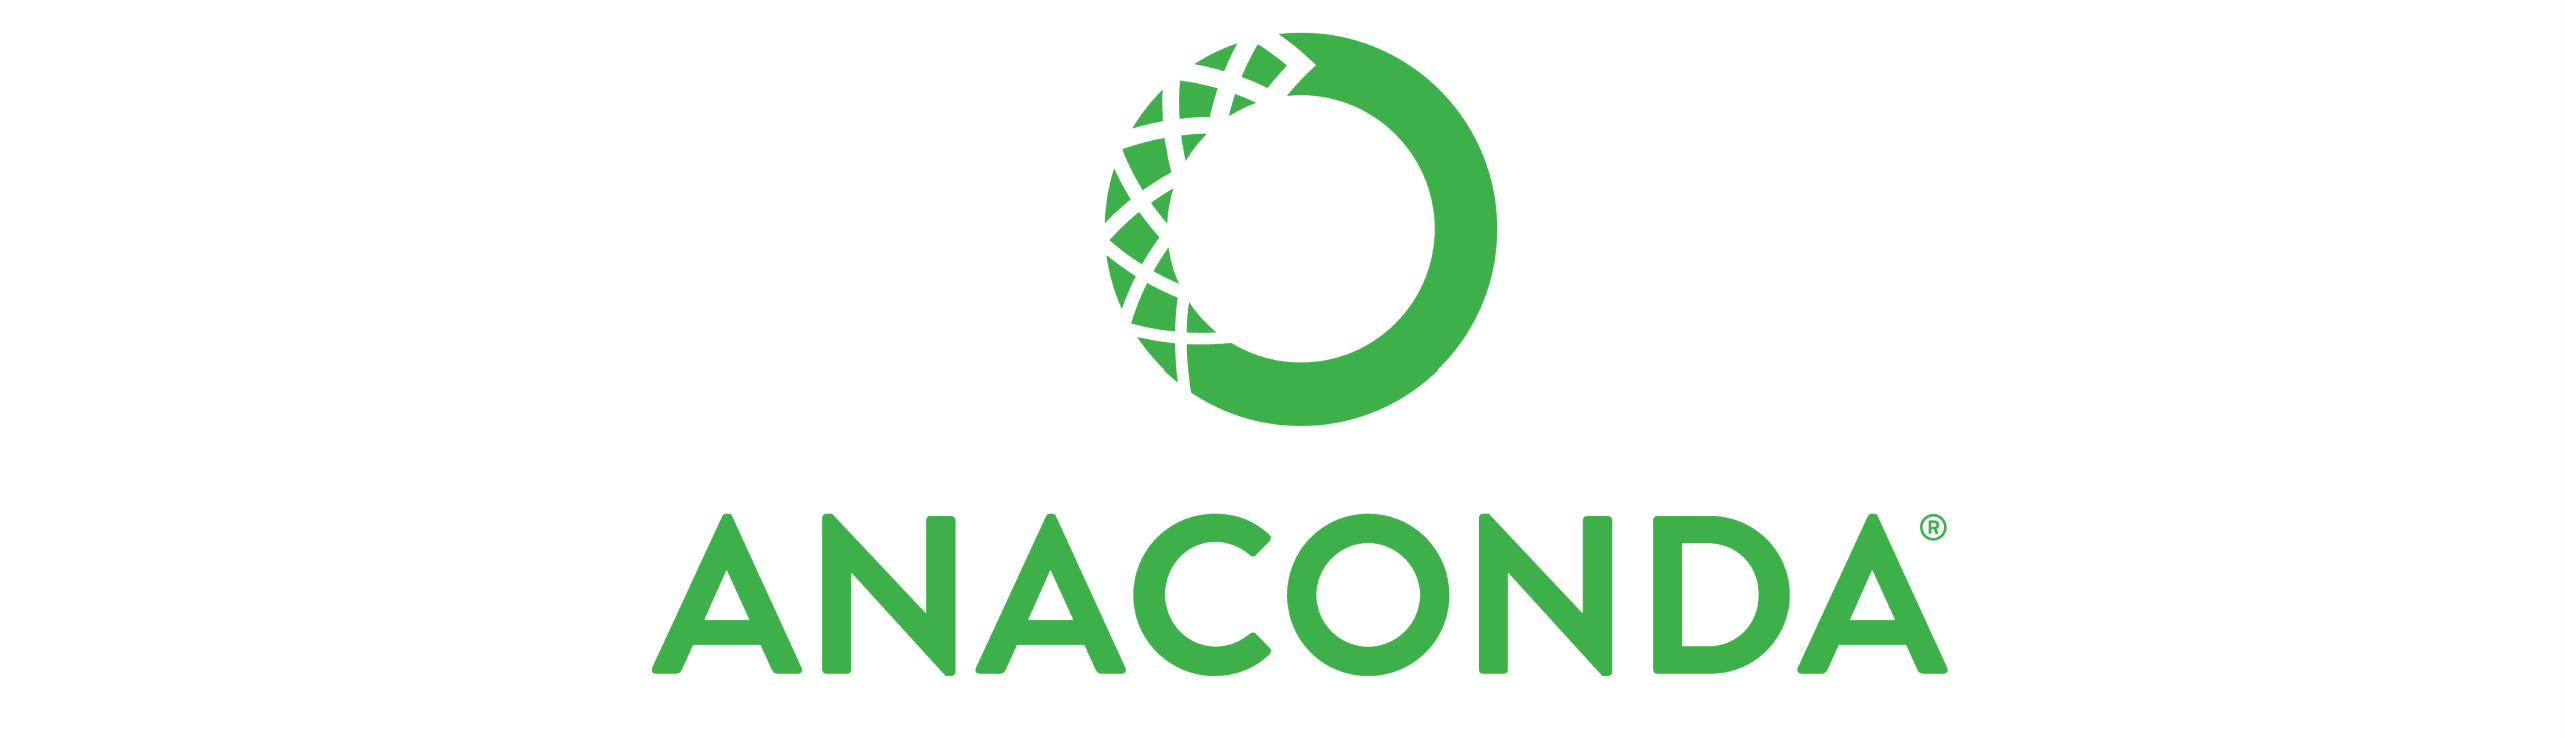

### 1.2.3 Miniconda

We recommend downloading and installing Miniconda, since it
- directly brings conda (as well as pip)
- is a minimal installer (only the core parts, unlike Anaconda)

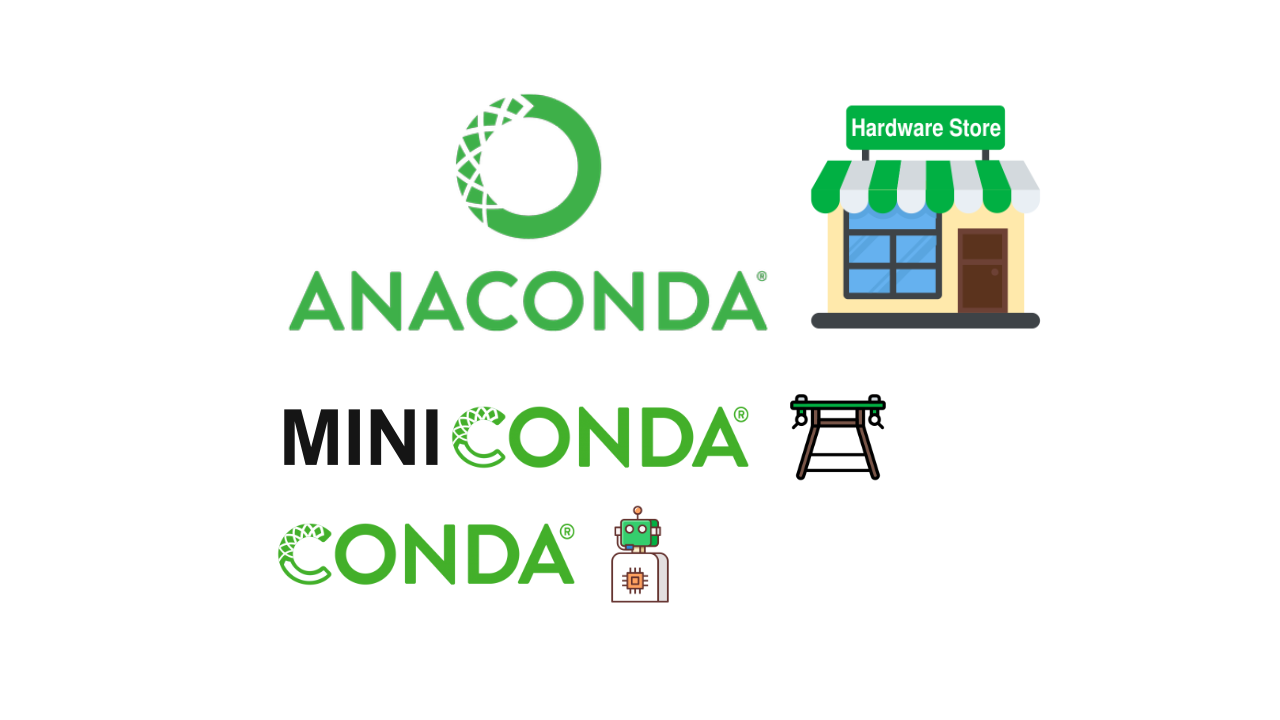

Source: https://www.mrdbourke.com/

### 1.2.4 Spyder

[Spyder](https://www.spyder-ide.org/) is a complete IDE for Python (very similar to RStudio)
- It directly comes with the Anaconda distribution
- It can also be installed from https://www.spyder-ide.org/


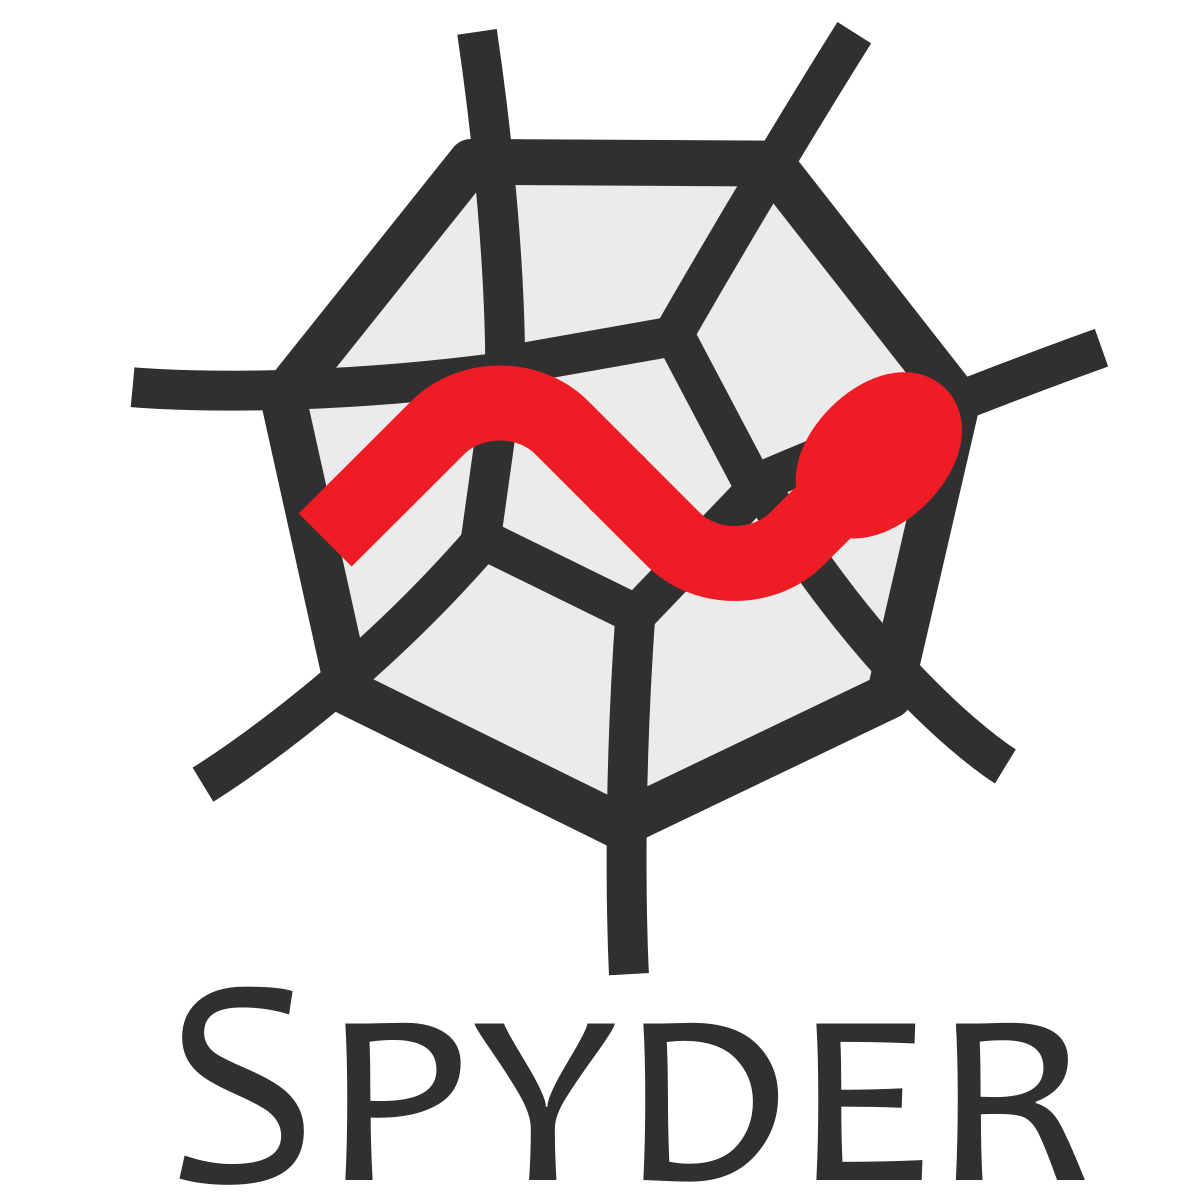

### 1.2.5 Jupyter Notebooks/Lab

A Jupyter Notebook is a slightly different way of writing and
presenting Python codes. It is a web application that lets you
develop Python code in your browser.
Useful for explorative analyses and for beginning stages of a project,
where you need frequent feedback.

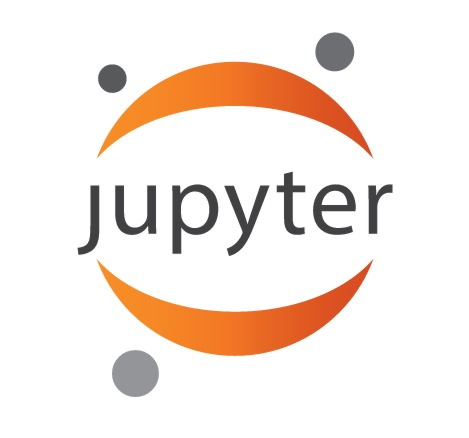

In [ ]:
conda install jupyterlab

Code cells vs. Markdown cells

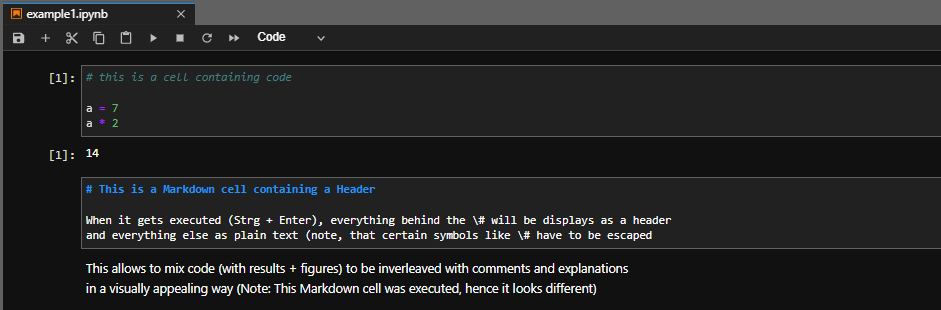

Creating e.g. figures

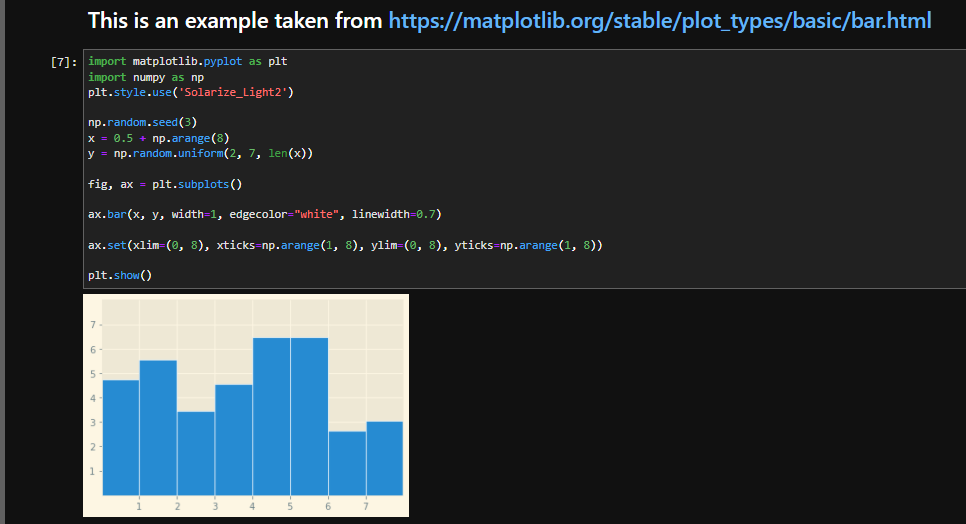

- When you click into a cell and you see your cursor, then you are in **Edit Mode**
- Write your Code/Explanations and execute with Ctrl+Enter
- Hit Esc: Cursor disappears, cell is still selected (you are in **Command mode** now)
- Now there are, among others, certain shortcuts available:
    - A will insert a new cell above the current one
    - B will insert one below
    - C copies the selected cell
    - X cuts the selected cell
    - V pastes copied/cut cell below
    - M switches the cell mode to Markdown
    - Y switches it to Code
    - Up selects cell above
    - Down selects cell below


### 1.2.6 Visual Studio Code

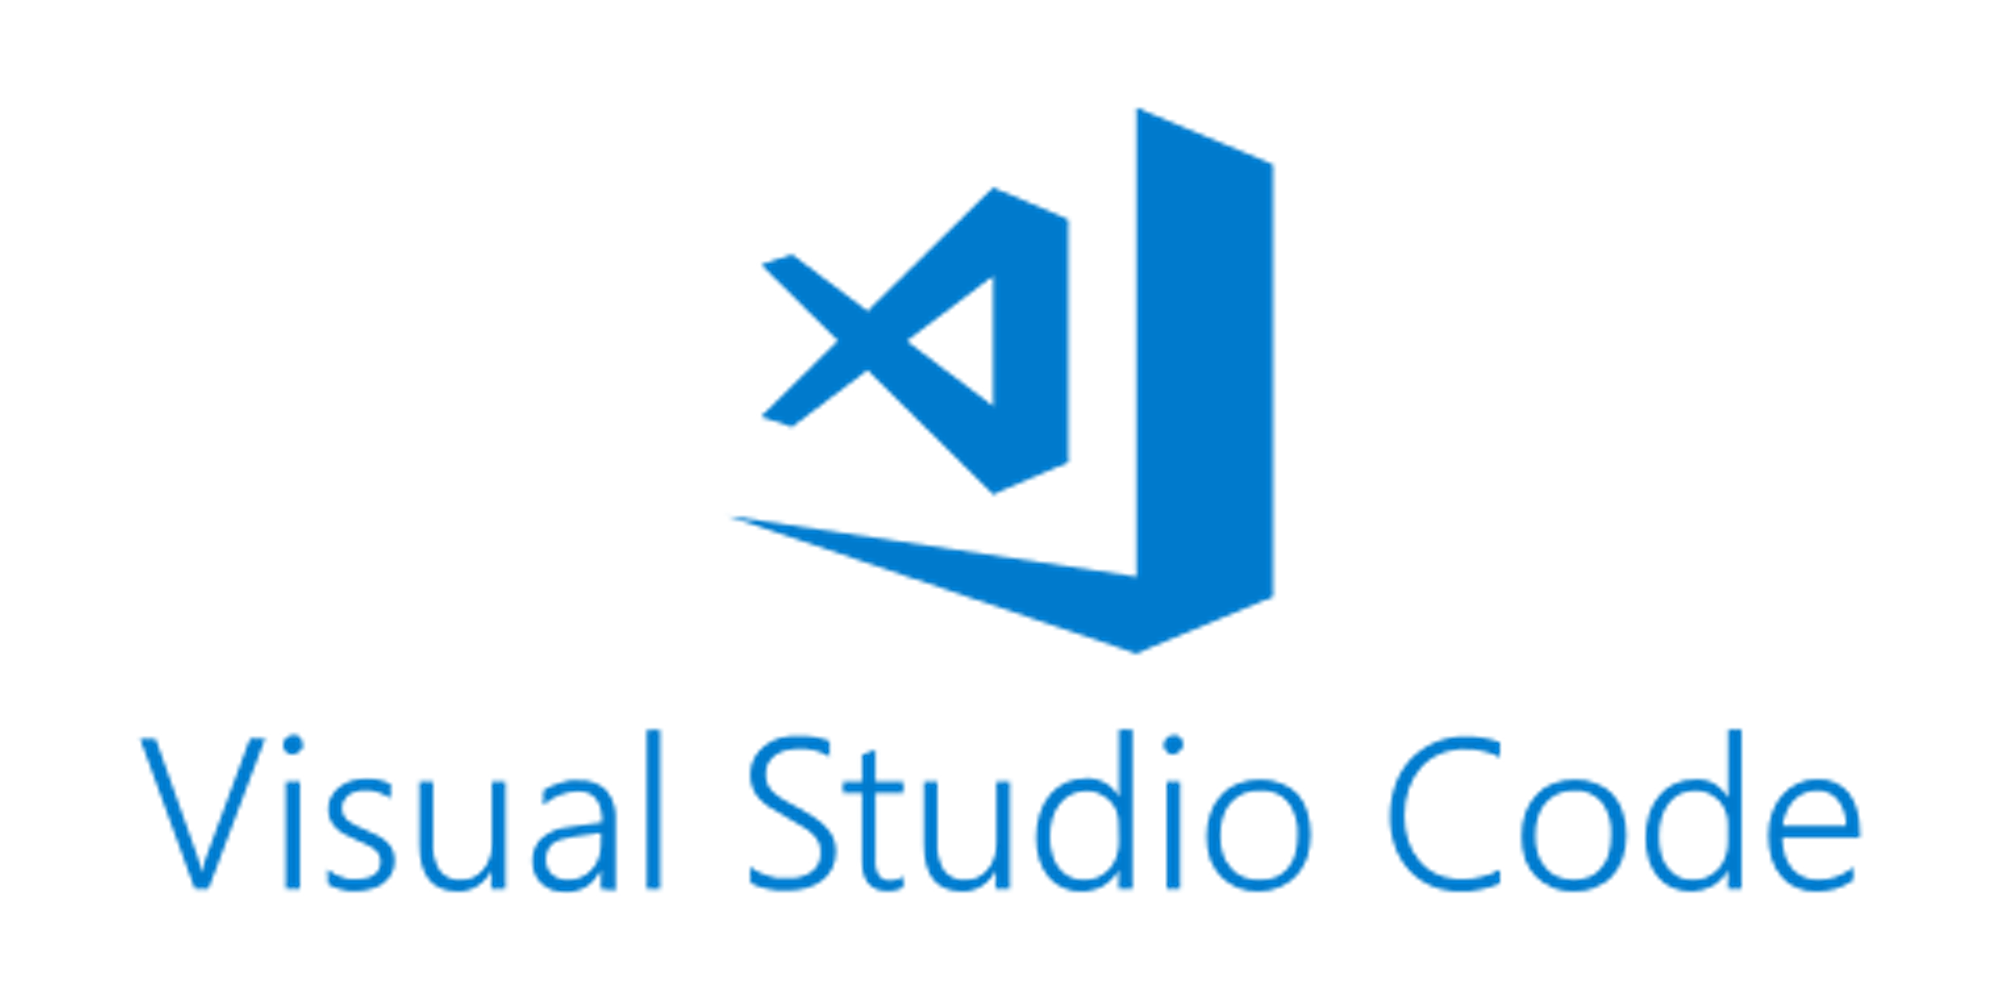

Here you can download the python and jupyter extension and set up the python and conda program you would like to use. 

Due to it's integrated terminal and explorer tab, it is a complete set up for daily tasks as well as software engineering tasks.

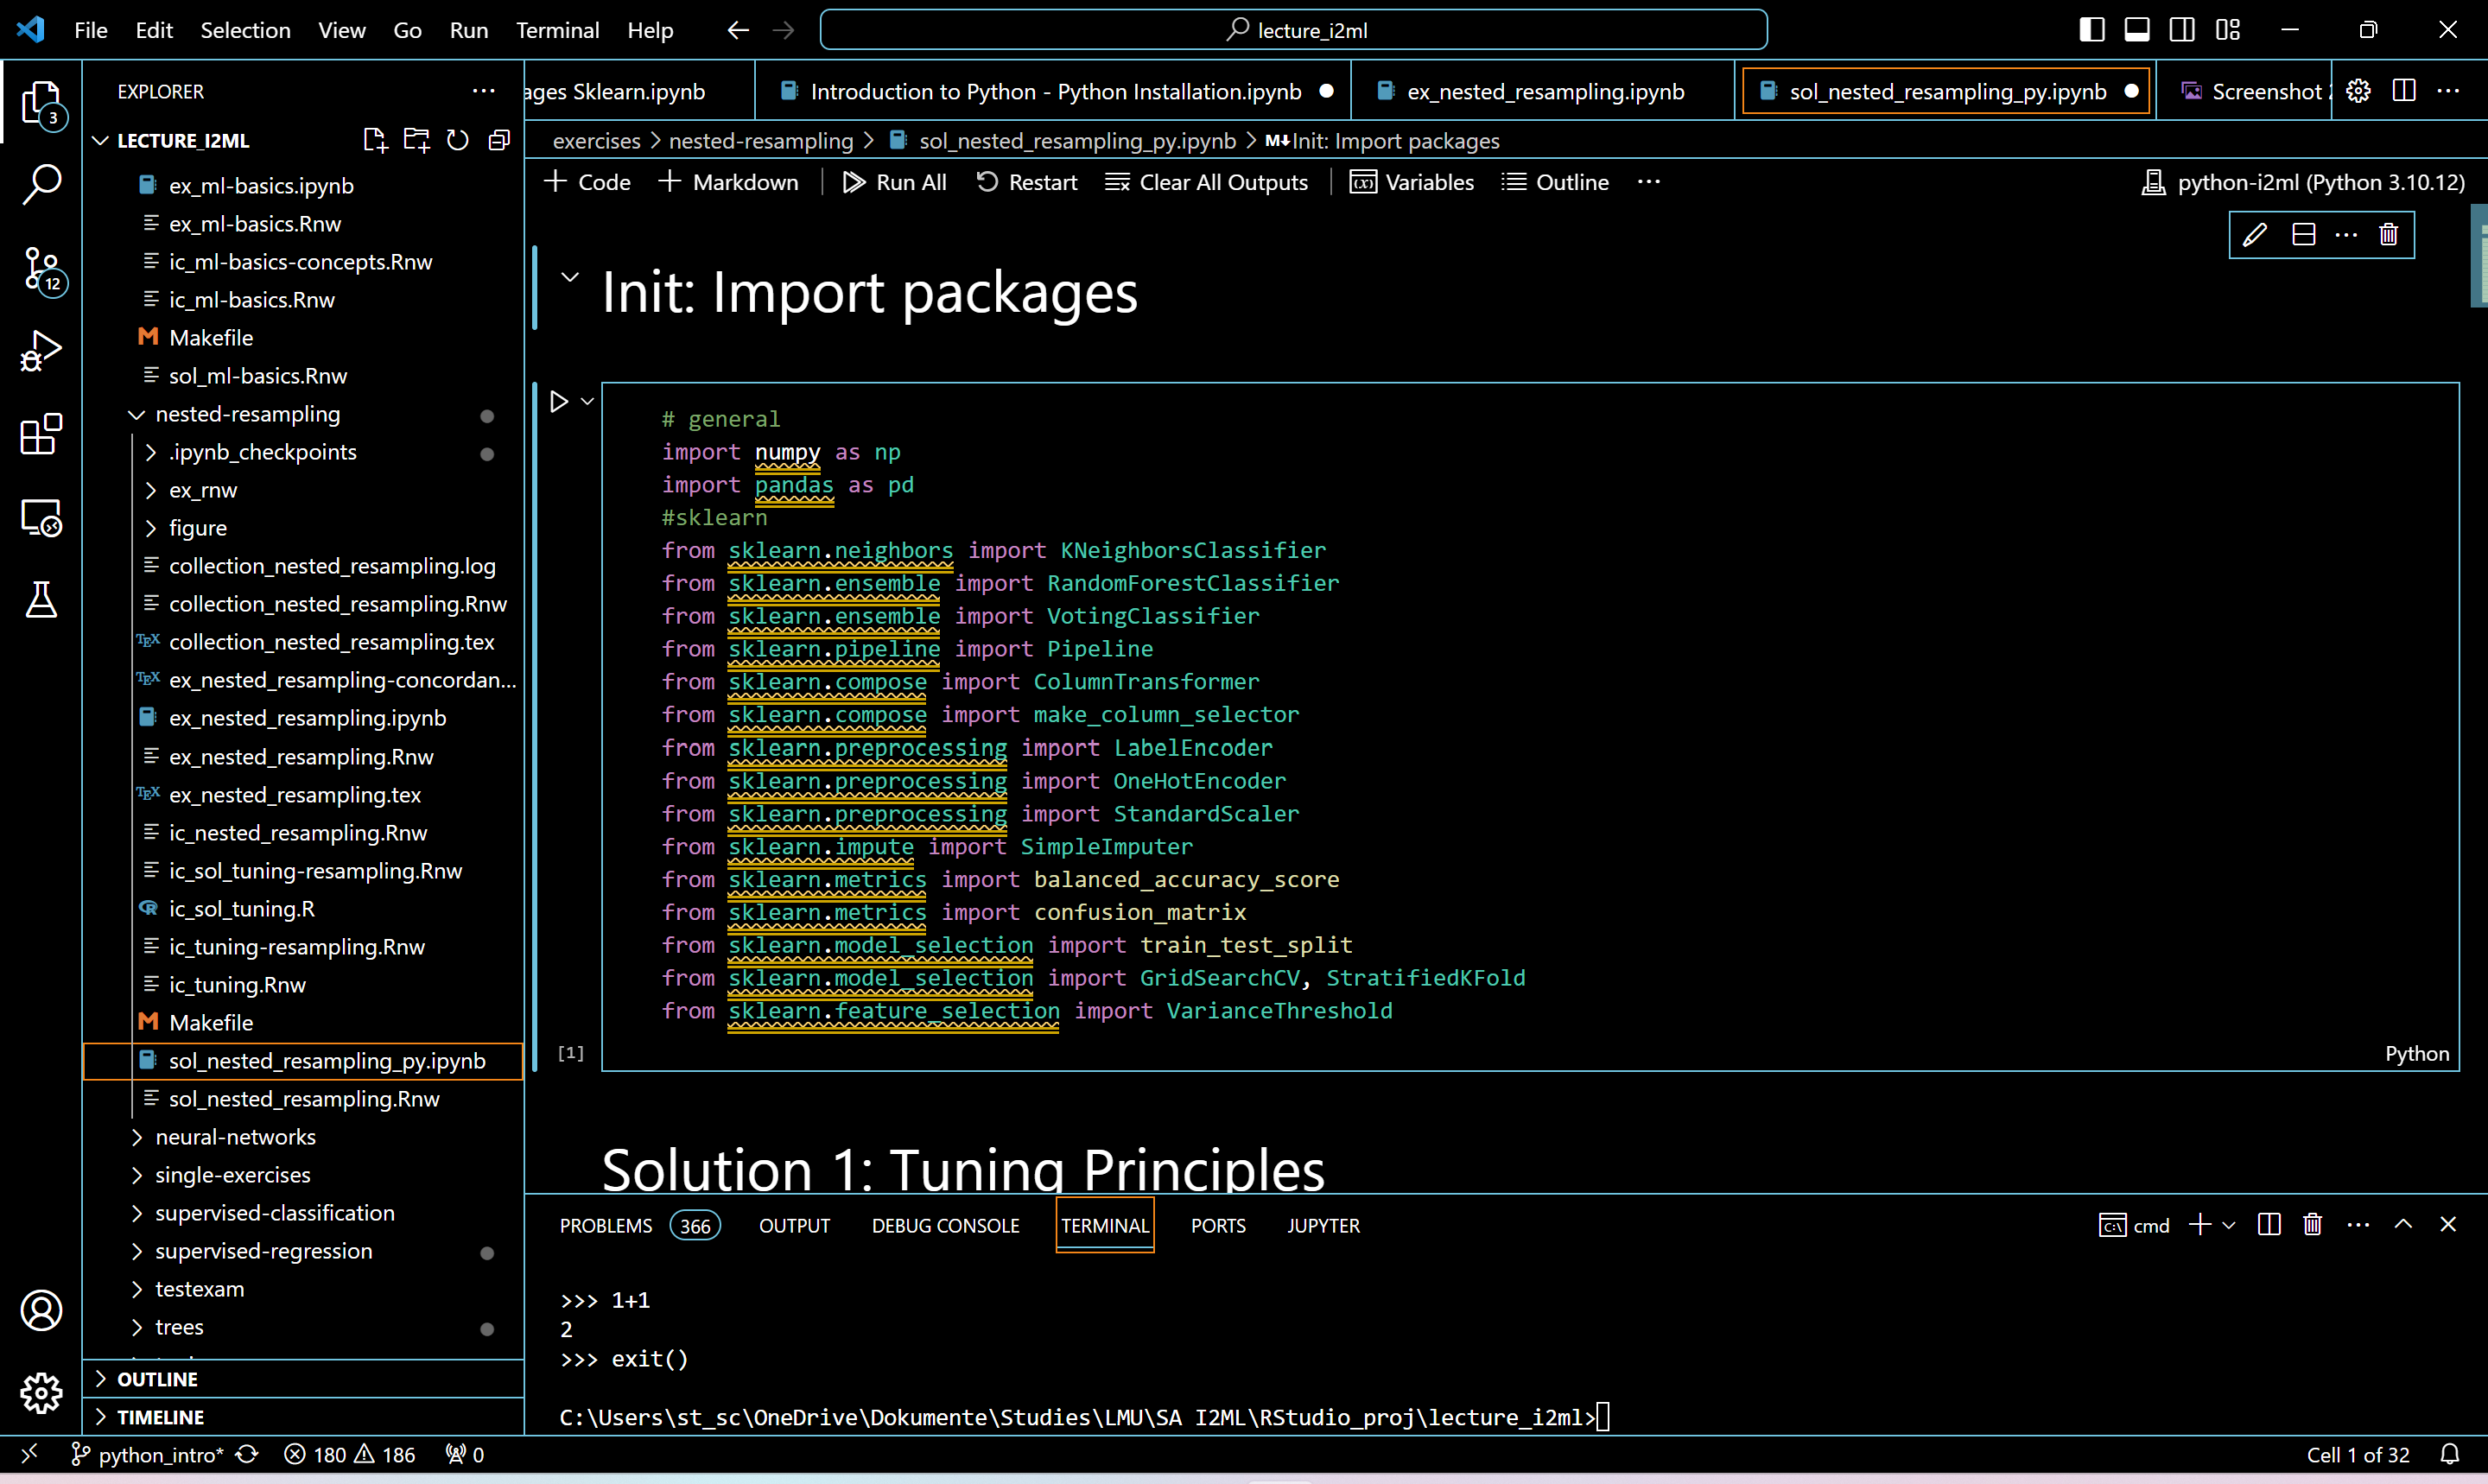

### 1.2.6 RStudio

It is (meanwhile) also possible to use good old RStudio as an IDE
for writing Python code:

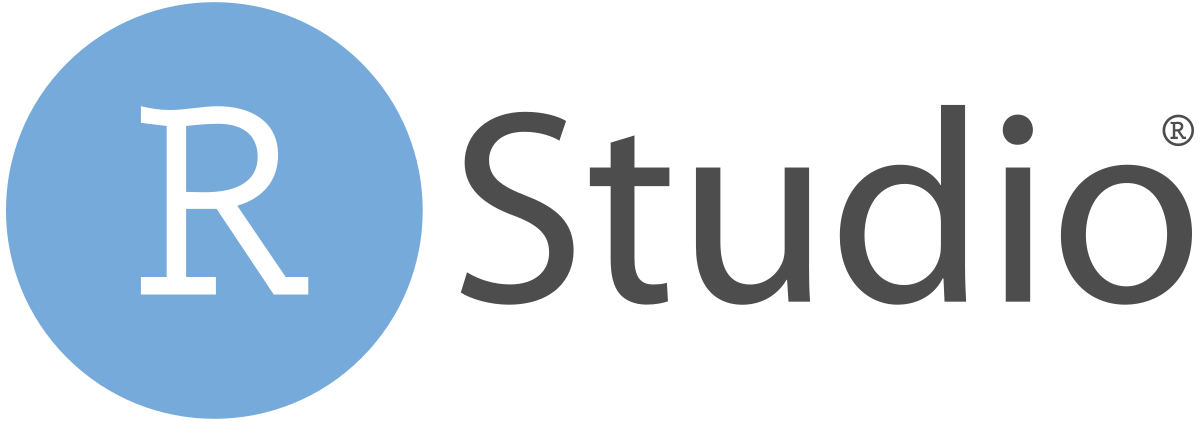

- Install the reticulate packages in R
- Select the desired Python interpreter at Tools > Global Options > Python
- New File > Python Script


You can also use Python in conjunction with R Markdown

In [108]:
import pandas as pd
x = pd.DataFrame({"a": [1,2,3,4], "b": ["c", "d", "e", "f"]})
x

,a,b
0,1,c
1,2,d
2,3,e
3,4,f


## 1.3 Virtual Environments

Assume the following scenario:
- We have two ongoing projects, Project A and Project B
- Both projects need some package pkg_xy
- Project A needs v1.2.0 while Project B requires v2.1.3
- What can we do about this??? <br>

Solution: Work with virtual environments
- You can also tell RStudio to activate environments automatically by ticking the box at:
> ⊠ Automatically activate project-local Python environment

Virtual Environments allow you to
- have different entire version of Python running on your machine (Python 2, Python 3.x, Python 3.y, ..)
- maintain different versions of packages for your projects

They can be created/activated/deactivated via

In [ ]:
conda create --name some_name python=3.9
conda activate some_name
conda deactivate some_name

Useful commands: [Conda Cheat Sheet](https://docs.conda.io/projects/conda/en/4.6.0/_downloads/52a95608c49671267e40c689e0bc00ca/conda-cheatsheet.pdf)

Different versions of Python

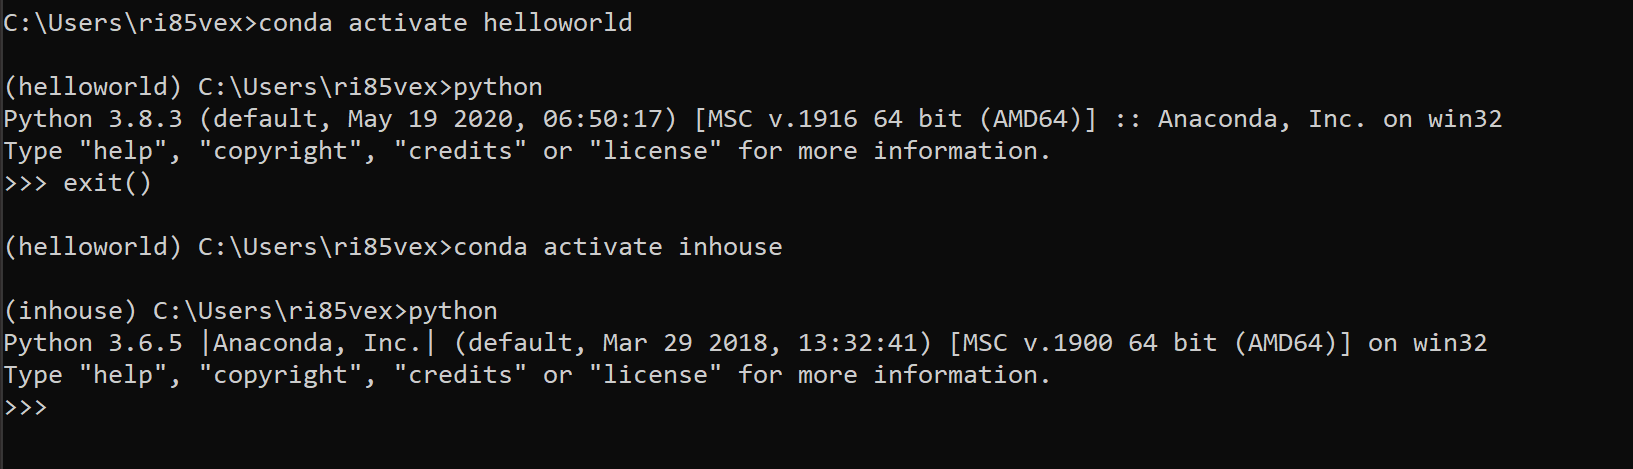

Different (versions of) packages

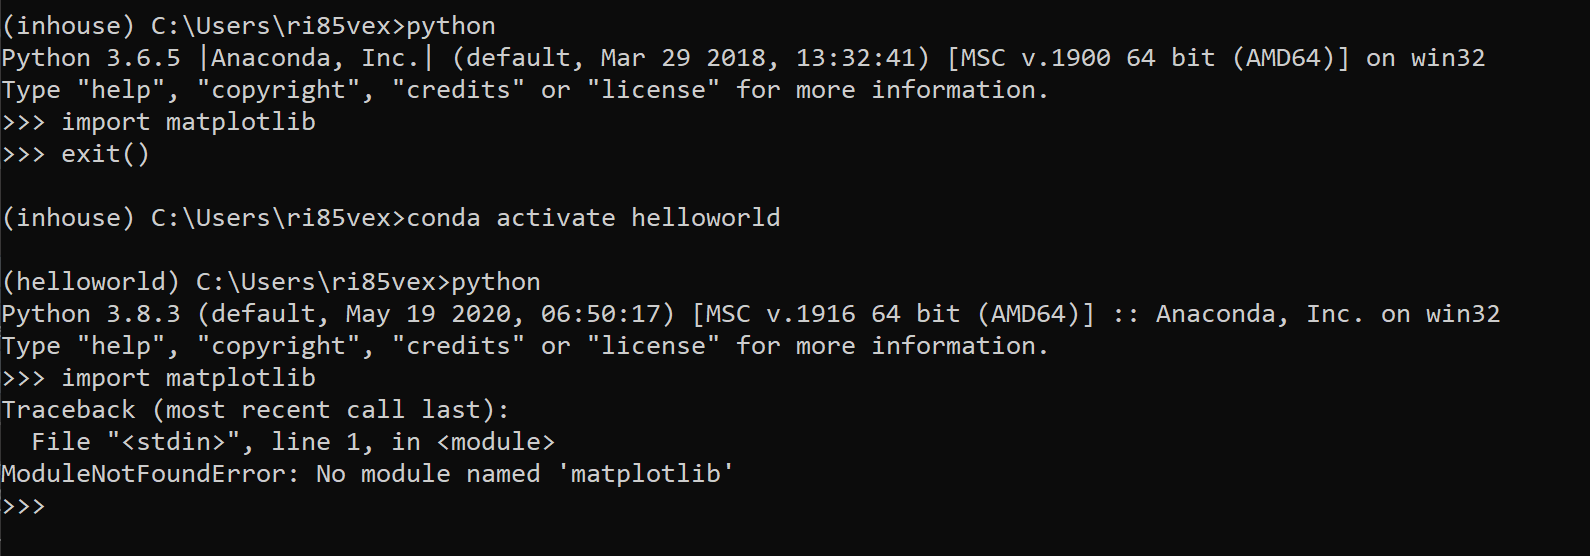

## 1.4 Managing packages

Via conda:

In [ ]:
conda install pandas
conda install pandas==1.3.5
conda update pandas
conda remove pandas
conda list

Via pip:

In [ ]:
pip install pandas
pip install pandas==1.3.5
pip install pandas --upgrade
pip uninstall pandas
pip freeze

Instruct conda which version you want to have installed:

In [ ]:
# Exact (1.3.5)
conda install pandas==1.3.5

In [ ]:
# Fuzzy (1.3.0, 1.3.1, etc.)
conda install pandas=1.3

In [ ]:
# Greater or equal (1.3.5 or higher)
conda install "pandas>=1.3.5"

In [ ]:
# OR (1.3.4 or 1.3.5)
conda install "pandas==1.3.4|1.3.5"

In [ ]:
# AND (1.3.3, 1.3.4, but not 1.4)
conda install "pandas>=1.3.3,<1.4"

## 1.5 Reproducibility

Creating isolated environments and running different versions of Python as well as different packages (or versions) of them works perfectly fine (for us). <br>

What if we want to share our code with others? Make it publicly available? Across platforms?
There needs to be some standardized way to do so, right?
- environment.yml (conda)
- requirements.txt (pip)

In [ ]:
# Create an environment (with specific Python version and some packages):
conda create -n my_env python=3.7 pandas numpy scikit-learn
# Activate the conda environment:
conda activate my_env
# Export the specifications of your conda environment:
conda env export > environment.yml

Note, that `-n` is the short version of the `--name` flag


Result (abbreviated):

In [ ]:
name: my_env
channels:
- defaults
dependencies:
- blas=1.0=mkl
- bottleneck=1.3.2=py37h2a96729_1
- ...
- numpy=1.21.2=py37hfca59bb_0
- numpy-base=1.21.2=py37h0829f74_0
- openssl=1.1.1l=h2bbff1b_0
- packaging=21.3=pyhd3eb1b0_0
- pandas=1.3.4=py37h6214cd6_0
- pip=21.2.4=py37haa95532_0
- pyparsing=3.0.4=pyhd3eb1b0_0
- python=3.7.11=h6244533_0
- python-dateutil=2.8.2=pyhd3eb1b0_0
- pytz=2021.3=pyhd3eb1b0_0
- scikit-learn=1.0.1=py37hf11a4ad_0
- scipy=1.7.1=py37hbe87c03_2
- ...
prefix: C:\Users\ri85vex\Miniconda3\envs\my_env

- Note 1: As you can see, this also includes all sorts of packages that are automatically installed when creating an environment
- Note 2: We observe some cryptic stuff after the version of each package
- Note 3: Those packages installed via pip are **also handled by this file** (see below)
- Note 4: The prefix is ignored when using the `.yml`-file for creation. So you can simply delete it after the export

Install some package via pip:

In [ ]:
pip install matplotlib

Result (abbreviated to fit on the slide):

In [ ]:
name: my_env
channels:
- defaults
dependencies:
- blas=1.0=mkl
- bottleneck=1.3.2=py37h2a96729_1
- ca-certificates=2021.10.26=haa95532_2
- certifi=2021.10.8=py37haa95532_0
- icc_rt=2019.0.0=h0cc432a_1
- intel-openmp=2021.4.0=haa95532_3556
- ...
- pip:
    - cycler==0.11.0
    - fonttools==4.28.5
    - kiwisolver==1.3.2
    - matplotlib==3.5.1
    - pillow==9.0.0
prefix: C:\Users\ri85vex\Miniconda3\envs\my_env

Using the `--from-history` flag

In [ ]:
conda env export --from-history > environment.yml

.. allows you to create a reduced version of the `.yml`-file containing
only the packages (+ version) you explicitly installed (**via conda**):

In [ ]:
name: my_env
channels:
- defaults
dependencies:
- scikit-learn
- numpy
- python=3.7
- pandas
prefix: C:\Users\ri85vex\Miniconda3\envs\my_env

Export specifications of the pip packages:

In [ ]:
pip freeze > requirements.txt

Can be installed in a conda environment via:

In [ ]:
pip install -r requirements.txt

But: Requiring others to execute these two steps is cumbersome!

Best practice: Create `.yml`-file manually

In [ ]:
name: my_env
channels:
- defaults
dependencies:
- python=3.7.11
- numpy=1.21.2
- pandas=1.3.4
- scikit-learn=1.0.1
- pip=21.2.4
- pip:
    # works for regular pip packages
    - matplotlib==2.0.0
    # also works for whole requirements-files:
    - -r requirements.txt

Finally: Create environment from `.yml`-file:

In [ ]:
conda env create -f environment.yml